# Task 2
In its current state, the map shows only one line with six stations. Expand the Python program by adding more lines and more stations. Follow a consistent colour scheme. The resulting map is expected to have minimum four lines with minimum six stations on each line, including interchange stations. The generated graph is expected to be connected, that is, there is always at least one route between any pair of stations. The generated graph is expected to represent accurately a section of the actual map of the transport network. A complete map of the transport network is not expected. Complete the Key according to the generated map. By following the same style as shown in the image above, add distances between the stations.

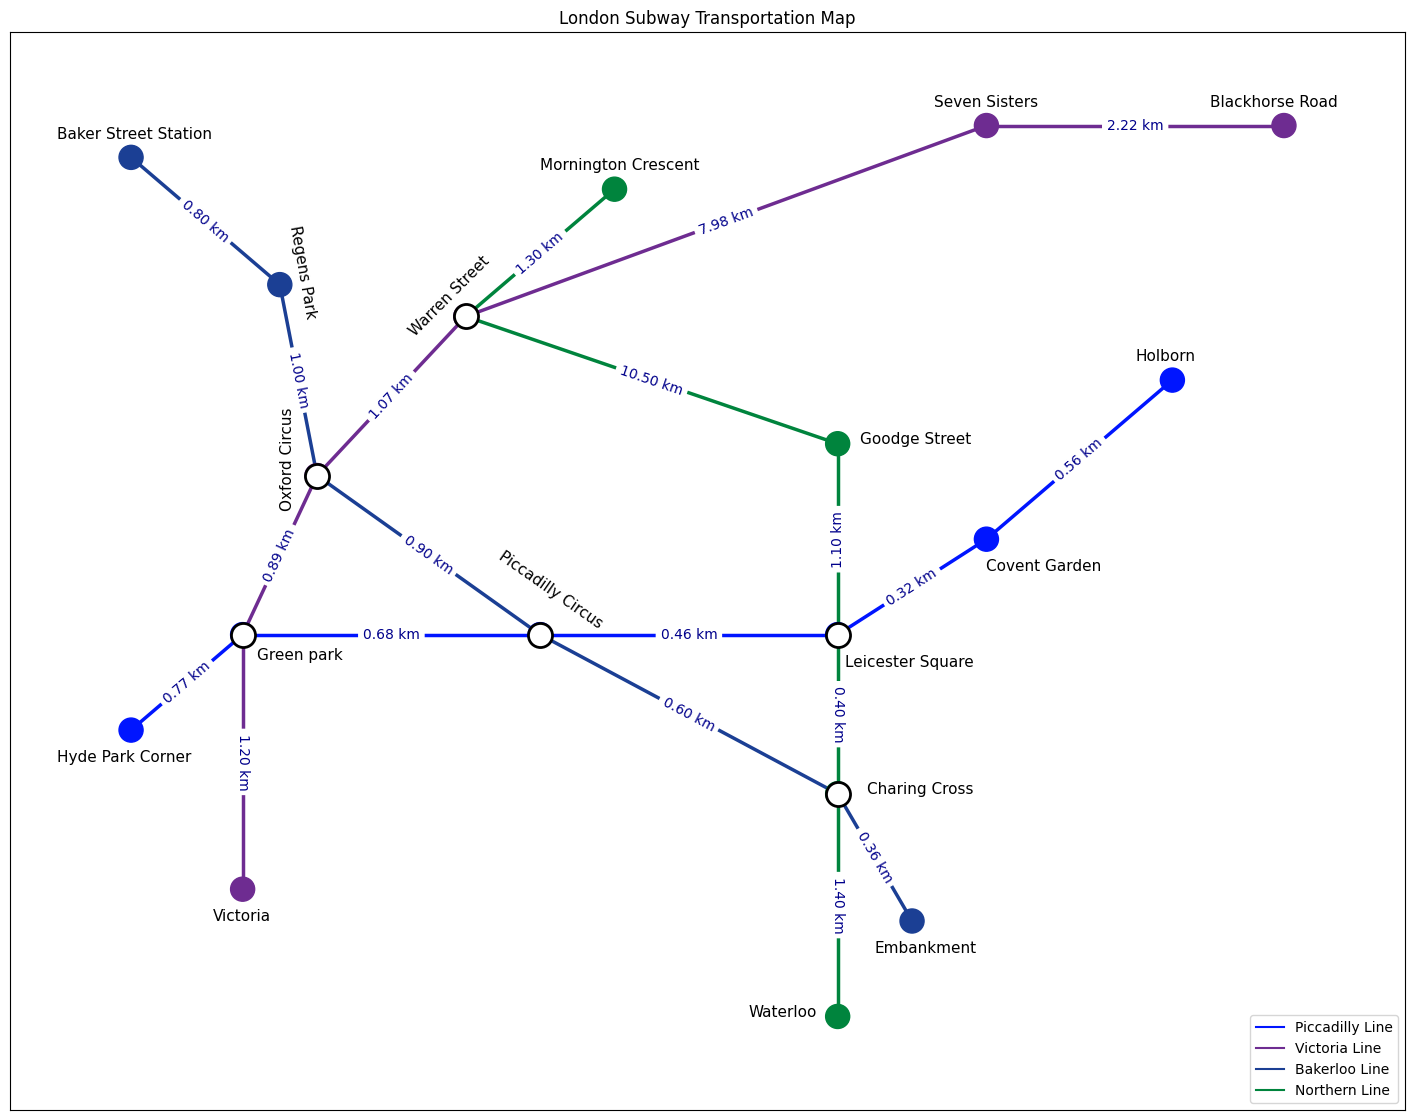

In [232]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


def draw_node_labels(edge_label_coords: list[dict], text_size: int = 11):
    for item in edge_label_coords:
        rotation = item.get("rotation", 0)
        plt.text(item["pos"]["x"], item["pos"]["y"], s=item["s"], size=text_size, rotation=rotation)


class MapGraph(nx.Graph):
    def add_node_to_graph(self, df):
        for index, row in df.iterrows():
            self.add_node(row["Station"], npos=(row["Latitude"], row["Longitude"]), ccn=row["Color"])
    
    def add_edge_to_graph(self, df):
        for index, row in df.iterrows():
            distance = row["Distance"]
            if row["Unit"] == "m":
                distance /= 1000
            self.add_edge(row["StartStation"], row["EndStation"], distance=f"{distance:.2f} km", cce=row["Color"], weight=round(distance))


col_names = ["Station", "Latitude", "Longitude", "Color"]
subway_df = pd.read_csv("subway_station_dataset.csv", usecols=col_names, na_values=["N/A", "Unknown"])
subway_df.dropna()
subway_df.drop_duplicates()

distance_df_colname = ["StartStation", "EndStation", "Distance", "Unit", "Color"]
distance_df = pd.read_csv("subway_station_distance.csv", usecols=distance_df_colname, na_values=["N/A", "Unknown"])
subway_df.dropna()
subway_df.drop_duplicates()

G = MapGraph()

G.add_node_to_graph(subway_df)
G.add_edge_to_graph(distance_df)

# Get positions from node attributes
pos = nx.get_node_attributes(G, 'npos')
node_colour = nx.get_node_attributes(G, 'ccn')
edge_colour = nx.get_edge_attributes(G, 'cce')

node_colours = list(node_colour.values())
edge_colours = list(edge_colour.values())

intersecting_nodes = ["Green Park", "Piccadilly Circus", "Oxford Circus", "Charing Cross", "Leicester Square", "Warren Street"]

# Plotting
plt.figure(figsize=(18, 14))

# Draw Network
nx.draw_networkx(G, pos, node_color=node_colours, with_labels=False)

# Draw Nodes
nx.draw_networkx_nodes(G, pos, nodelist=intersecting_nodes, node_color='white', edgecolors='black', linewidths=2, node_size=300)

# Draw Edges
nx.draw_networkx_edges(G, pos, edge_color=edge_colours, width=2.5)

# Draw edge labels with distances
edge_labels = nx.get_edge_attributes(G, 'distance')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='darkblue')

text_size = 11
edge_label_coords = [
    # Piccadilly Label
    {"s": "Hyde Park Corner", "pos": {"x": 25, "y": 30}},
    {"s": "Green park", "pos": {"x": 52, "y": 46}},
    {"s": "Piccadilly Circus", "pos": {"x": 84, "y": 51}, "rotation": -35},
    {"s": "Leicester Square", "pos": {"x": 131, "y": 45}},
    {"s": "Covent Garden","pos": {"x": 150, "y": 60}},
    {"s": "Holborn", "pos": {"x": 170, "y": 93}},
    # Victoria Line Label
    {"s": "Victoria", "pos": {"x": 46, "y": 5}},
    {"s": "Oxford Circus", "pos": {"x": 55, "y": 70}, "rotation": 90},
    {"s": "Warren Street", "pos": {"x": 72, "y": 97}, "rotation": 45},
    {"s": "Seven Sisters", "pos": {"x": 143, "y": 133}},
    {"s": "Blackhorse Road", "pos": {"x": 180, "y": 133}},
    # Bakerloo Line Label
    {"s": "Embankment", "pos": {"x": 135, "y": 0}},
    {"s": "Charing Cross", "pos": {"x": 134, "y": 25}},
    {"s": "Regens Park", "pos": {"x": 56, "y": 100}, "rotation": 280},
    {"s": "Baker Street Station", "pos": {"x": 25, "y": 128}},
    # Northern Line Label
    {"s": "Waterloo", "pos": {"x": 118, "y": -10}},
    {"s": "Goodge Street", "pos": {"x": 133, "y": 80}},
    {"s": "Mornington Crescent", "pos": {"x": 90, "y": 123}},
]

draw_node_labels(edge_label_coords, text_size=text_size)

# Add a custom legend
plt.plot([], [], color="#0015ff", label="Piccadilly Line")
plt.plot([], [], color="#6e2c91", label="Victoria Line")
plt.plot([], [], color="#1b3f94", label="Bakerloo Line")
plt.plot([], [], color="#00843d", label="Northern Line")
plt.legend(loc="lower right")

# Display the title and remove axes
plt.title("London Subway Transportation Map")

# Save Graph to image
plt.savefig("task2.png")
plt.show()
